In [35]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [18]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Replace multiple whitespace characters with a single space
    text = re.sub(r'\s+', ' ', text)
    # Replace line breaks with a space
    text = text.replace('\\n', ' ')
    text = text.replace('\n', ' ')

    # Replace dashes with spaces
    text = text.replace('-', ' ')

    # Remove special characters, punctuation (except apostrophes), and symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    # stop_words = set(stopwords.words('english'))
    # tokens = [token for token in tokens if token not in stop_words]
    
    # Porter stemming (optional)
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [19]:
file_train = 'data/subtask1/train.json'
file_validation = 'data/subtask1/validation.json'

# Open the JSON file
with open(file_train, 'r') as file:
    # Load the JSON data
    data = json.load(file)

# Create a list of dictionaries
entries_list = []

# Iterate through each entry in the JSON data
for entry in data:
    # Extract relevant information from each entry
    entry_dict = {
        "id": entry["id"],
        "text": entry["text"],
        "labels": entry["labels"],
        "link": entry["link"]
    }

    # Append the dictionary to the list
    entries_list.append(entry_dict)

# Now 'entries_list' contains a list of dictionaries, each representing an entry in your JSON file
# You can access the information as needed
for entry_dict in entries_list:
    print(f"ID: {entry_dict['id']}, Text: {entry_dict['text']}, Labels: {entry_dict['labels']}, Link: {entry_dict['link']}")

ID: 65635, Text: THIS IS WHY YOU NEED\n\nA SHARPIE WITH YOU AT ALL TIMES, Labels: ['Black-and-white Fallacy/Dictatorship'], Link: https://www.facebook.com/photo/?fbid=4023552137722493&set=g.633131750534436
ID: 67927, Text: GOOD NEWS!\n\nNAZANIN ZAGHARI-RATCLIFFE AND ANOOSHEH ASHOORI HAVE BEEN RELEASED\n\nAfter years of being unjustly detained in Iran, they are making their way safely back to the UK., Labels: ['Loaded Language', 'Glittering generalities (Virtue)'], Link: https://www.facebook.com/amnesty/photos/5311988665480629/
ID: 68031, Text: PAING PHYO MIN IS FREE!, Labels: [], Link: https://www.facebook.com/amnesty/photos/4274191309260375/
ID: 77490, Text: Move your ships away!\n\noooook\n\nMove your ships away!\n\nNo, and I just added 10 more, Labels: [], Link: https://www.facebook.com/rightpatriots/photos/pb.100064494145299.-2207520000./606109399734747/?type=3
ID: 67641, Text: WHEN YOU'RE THE FBI, THEY LET YOU DO IT., Labels: ['Thought-terminating cliché'], Link: https://www.faceb

In [20]:
# Create a new list to store the preprocessed dictionaries
preprocessed_list = []

for entry in entries_list:
    preprocessed_entry = entry.copy()
    preprocessed_entry['text'] = preprocess_text(entry['text'])
    if len(preprocessed_entry['labels']) == 0:
        preprocessed_entry['labels'] = ['nocat']
    else:
        t = preprocessed_entry.get('labels',[0])[0]
        # print(f'aos {t}')
        preprocessed_entry['labels'] = [t]
        # preprocessed_entry['labels'] = preprocessed_entry['labels']    
    preprocessed_list.append(preprocessed_entry)


# Display the preprocessed data
for id,entry in enumerate(preprocessed_list):
    print(f"ID: {entry['id']}, Text: {entry['text']} Label: {entry['labels']}")
    # print(f"ID: {entries_list[id]['id']}, Text: {entries_list[id]['text']}")

ID: 65635, Text: this is why you need a sharpie with you at all times Label: ['Black-and-white Fallacy/Dictatorship']
ID: 67927, Text: good news nazanin zaghari ratcliffe and anoosheh ashoori have been released after years of being unjustly detained in iran they are making their way safely back to the uk Label: ['Loaded Language']
ID: 68031, Text: paing phyo min is free Label: ['nocat']
ID: 77490, Text: move your ships away oooook move your ships away no and i just added more Label: ['nocat']
ID: 67641, Text: when youre the fbi they let you do it Label: ['Thought-terminating cliché']
ID: 66402, Text: putins secret camouflage army Label: ['nocat']
ID: 79204, Text: january you dont buy a million dollar waterfront house on marthas vineyard if you really believe the oceans are rising Label: ['Whataboutism']
ID: 79372, Text: term limits are everywhere politicians cant ignore it term limits ahead Label: ['Slogans']
ID: 68254, Text: nicola sturgeon were scottish getusoutofhere will his bushtu

In [21]:

# Initialize a dictionary to store label counts per category
category_counts = {}
ids_ohne_label = []
ids_mit_label = []
max_id = 0

# Loop through the dataset
for entry in preprocessed_list:
    labels = entry.get('labels', [])  # Get the labels for the current entry

    if not labels:
        ids_ohne_label.append(entry['id'])
    else:
        ids_mit_label.append(entry['id'])
        for label in labels:
            if label not in category_counts:
                category_counts[label] = 1
            else:
                category_counts[label] += 1
    if len(labels) > max_id:
        max_id = len(labels)
        idx = entry['id']


# Display the label counts per category
for category, count in category_counts.items():
    print(f"Category: {category}, Count: {count}")

f_list = [d for d in preprocessed_list if d.get('id') == idx]

print(f'ids ohne labels: {len(ids_ohne_label)} ids mit labels: {len(ids_mit_label)} max_labels {max_id}')
print(f'id {idx} text: {f_list}')

Category: Black-and-white Fallacy/Dictatorship, Count: 371
Category: Loaded Language, Count: 1384
Category: nocat, Count: 1264
Category: Thought-terminating cliché, Count: 136
Category: Whataboutism, Count: 81
Category: Slogans, Count: 252
Category: Causal Oversimplification, Count: 110
Category: Name calling/Labeling, Count: 639
Category: Appeal to authority, Count: 816
Category: Repetition, Count: 132
Category: Smears, Count: 714
Category: Exaggeration/Minimisation, Count: 142
Category: Flag-waving, Count: 225
Category: Doubt, Count: 287
Category: Glittering generalities (Virtue), Count: 238
Category: Obfuscation, Intentional vagueness, Confusion, Count: 11
Category: Appeal to fear/prejudice, Count: 86
Category: Bandwagon, Count: 48
Category: Presenting Irrelevant Data (Red Herring), Count: 27
Category: Reductio ad hitlerum, Count: 20
Category: Misrepresentation of Someone's Position (Straw Man), Count: 17
ids ohne labels: 0 ids mit labels: 7000 max_labels 1
id 65635 text: [{'id': '6

In [63]:
labels = [label for d in preprocessed_list for label in d.get("labels", [])]
quotes = [d["text"] for d in preprocessed_list]

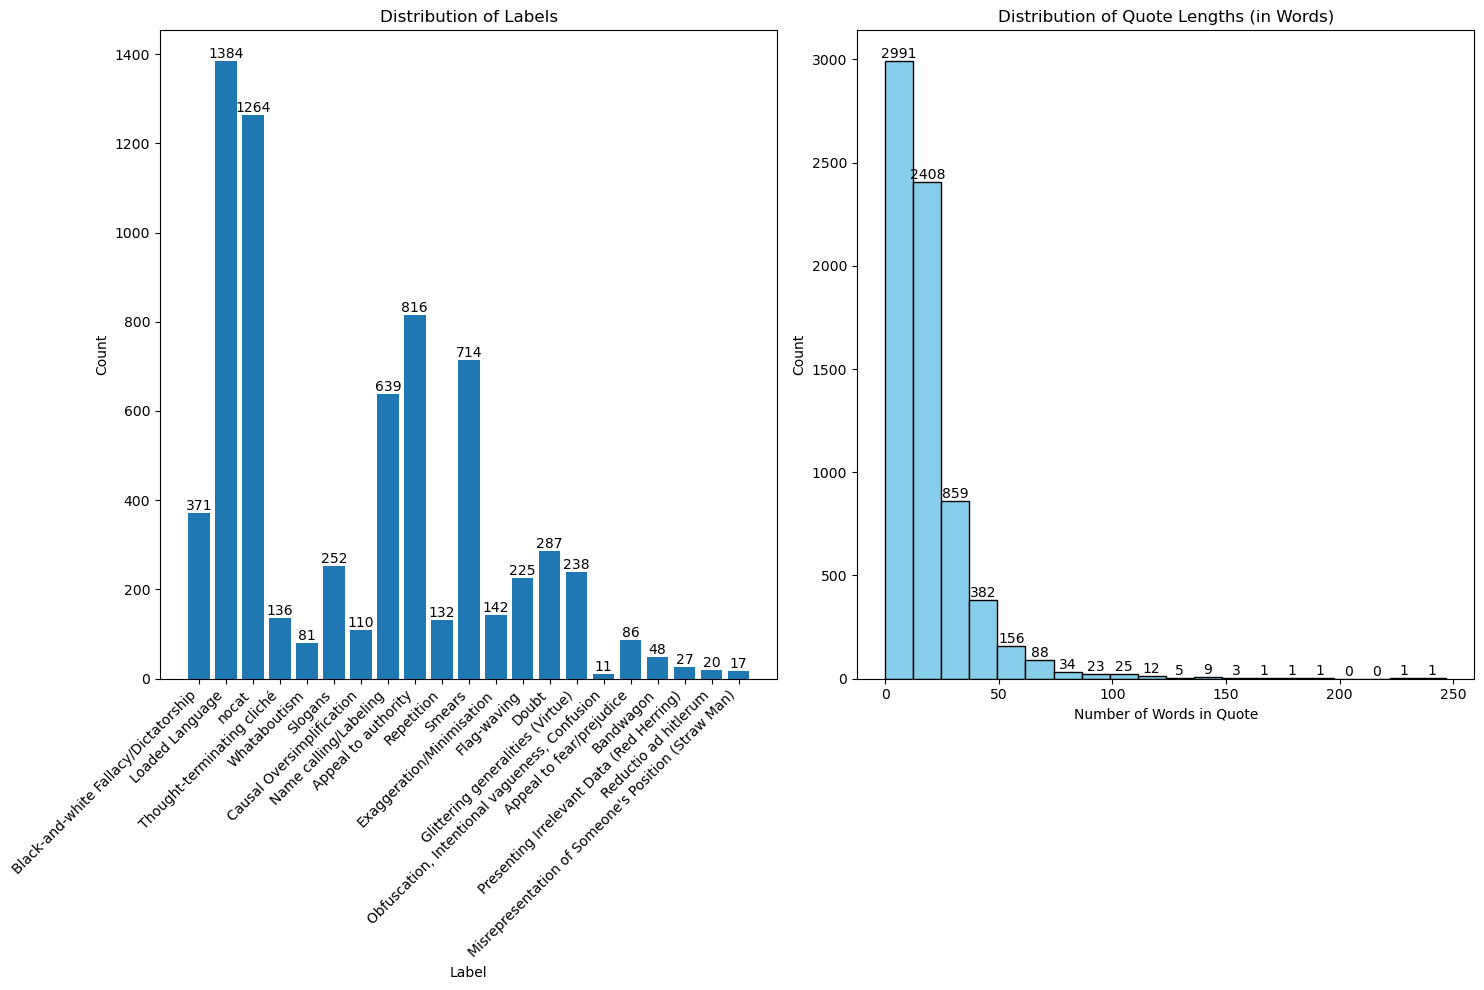

In [80]:
# Plotting the distribution of labels
plt.figure(figsize=(15, 10))


# Plotting the distribution of labels
plt.subplot(1, 2, 1)
label_counts = Counter(labels)
bars = plt.bar(*zip(*label_counts.items()))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis text

# Add text labels above each bar in the bar plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Calculating and plotting a histogram of quote lengths in words
quote_word_counts = [len(quote.split()) for quote in quotes]

plt.subplot(1, 2, 2)
counts, bins, _ = plt.hist(quote_word_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words in Quote')
plt.ylabel('Count')
plt.title('Distribution of Quote Lengths (in Words)')

# Add text labels above each bar in the histogram
for i in range(len(counts)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, counts[i], str(int(counts[i])), ha='center', va='bottom')


plt.tight_layout()

plt.show()